## C5. DEM statistics and distribution

#### 0. Load required libraries, site dependant constants and utility functions.

In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import seaborn as sns

# EOLearn libraries:
from eolearn.core import EOTask, EOPatch, LinearWorkflow, LoadTask, SaveTask, FeatureType, EOExecutor
from eolearn.core import OverwritePermission

# Add to python path parent dictionary (to have acces to the data and util catalogue)
import sys
sys.path.append("../../")

# load site dependant constants (HERE YOU CAN CHOOSE DIFFERENT LOCATION)
from aoi_sites import upe_promice_area as site

# load utility functions
from utils import io_functions as io_utils
from utils import plot_functions as plot_utils

#### 1. Check variables

In [2]:
eo_patch = EOPatch.load('../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2019_05-2019_10/2969_maxcc_0.05_x-3_y-130')
eo_patch

EOPatch(
  data: {
    DATASET_CLD_200_dil_6_str2: numpy.ndarray(shape=(23, 333, 333, 11), dtype=float32)
    LANDSAT_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_GREEN_NIR: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_ICE: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_1: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    LANDSAT_NDWI_NIR_SWIR_2: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    LANDSAT_QA_LAYERS: numpy.ndarray(shape=(23, 333, 333, 5), dtype=float32)
    LANDSAT_RAW_BANDS: numpy.ndarray(shape=(23, 333, 333, 11), dtype=float32)
    MODIS_EUC_NORM_RAW_BANDS: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    MODIS_NDWI: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    MODIS_NRB: numpy.ndarray(shape=(23, 333, 333, 1), dtype=float32)
    MODIS_RAW_BANDS_DAY_0: numpy.n

#### 2. Get all eo_patch names from one year to check DEM (same across all the years)

In [3]:
eopatches_filepath = io_utils.get_eopatches_dir(site.DATA_PRODUCTS[1], site.SITE_NAME, site.AVAILABLE_CRSs[0], site.DATE_RANGES_LANDSAT_8[0])
print('Reading EOPatches from:', site.DATE_RANGES_LANDSAT_8[0])
list_of_available_patches = io_utils.get_list_of_eopatches(eopatches_filepath)
eopatches_filepath

Reading EOPatches from: ('2013-05-01', '2013-10-31')


'../../data/EOPatches/LANDSAT_8/UPE_PROMICE/UTM_22N/2013_05-2013_10/'

In [4]:
all_elevation = []
all_slope = []
all_std = []
all_var = []

for eo_patch_name in list_of_available_patches :
    print(eo_patch_name)
    eo_patch = EOPatch.load(eopatches_filepath+eo_patch_name)
    
    all_elevation.append(eo_patch.data_timeless['DEM_RAW_LAYER'].squeeze())
    all_slope.append(eo_patch.data_timeless['DEM_SLOPE_LAYER'].squeeze()[1:332,1:332])
    all_std.append(eo_patch.meta_info['DEM_RAW_STD'])
    all_var.append(eo_patch.meta_info['DEM_RAW_VAR'])

    
all_elevation_arr = np.vstack(all_elevation)
all_slope_arr = np.vstack(all_slope)
all_std_arr = np.vstack(all_std)
all_var_arr = np.vstack(all_var)

2969_maxcc_0.05_x-3_y-130
2970_maxcc_0.05_x-3_y-131
2971_maxcc_0.05_x-3_y-132
2972_maxcc_0.05_x-3_y-133
2973_maxcc_0.05_x-3_y-134
2974_maxcc_0.05_x-3_y-135
2975_maxcc_0.05_x-3_y-136
2976_maxcc_0.05_x-3_y-137
2977_maxcc_0.05_x-3_y-138
2978_maxcc_0.05_x-3_y-139
2979_maxcc_0.05_x-3_y-140
3059_maxcc_0.05_x-4_y-130
3060_maxcc_0.05_x-4_y-131
3061_maxcc_0.05_x-4_y-132
3062_maxcc_0.05_x-4_y-133
3063_maxcc_0.05_x-4_y-134
3064_maxcc_0.05_x-4_y-135
3065_maxcc_0.05_x-4_y-136
3066_maxcc_0.05_x-4_y-137
3067_maxcc_0.05_x-4_y-138
3068_maxcc_0.05_x-4_y-139
3069_maxcc_0.05_x-4_y-140
3172_maxcc_0.05_x-5_y-130
3173_maxcc_0.05_x-5_y-131
3174_maxcc_0.05_x-5_y-132
3175_maxcc_0.05_x-5_y-133
3176_maxcc_0.05_x-5_y-134
3177_maxcc_0.05_x-5_y-135
3178_maxcc_0.05_x-5_y-136
3179_maxcc_0.05_x-5_y-137
3180_maxcc_0.05_x-5_y-138
3181_maxcc_0.05_x-5_y-139
3182_maxcc_0.05_x-5_y-140
3306_maxcc_0.05_x-6_y-130
3307_maxcc_0.05_x-6_y-131
3308_maxcc_0.05_x-6_y-132
3309_maxcc_0.05_x-6_y-133
3310_maxcc_0.05_x-6_y-134
3311_maxcc_0

#### 3.Plot  distribution of area elevation:

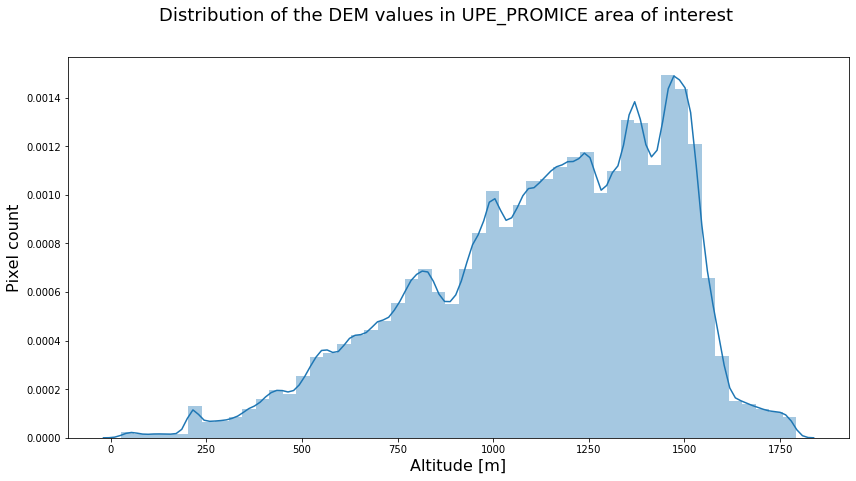

In [41]:
from matplotlib import pyplot
import seaborn
shape = all_elevation_arr.squeeze().shape
a4_dims = (14, 7)

fig, ax = pyplot.subplots(figsize=a4_dims)

fig.suptitle('Distribution of the DEM values in UPE_PROMICE area of interest', fontsize=18)
ax.set_xlabel('Altitude [m]', fontsize=16)
ax.set_ylabel('Pixel count', fontsize=16)
#ax.set_yticklabels(labels=[0.0000,0.0002,0.0004,0.0006,0.0008,0.0010,0.0012,0.0014], fontsize=12)
#seaborn.violinplot(ax=ax, data=df, **violin_options)
sns.distplot(all_elevation_arr.reshape( shape[0]*shape[1]))
fig.savefig('./ggg.png')

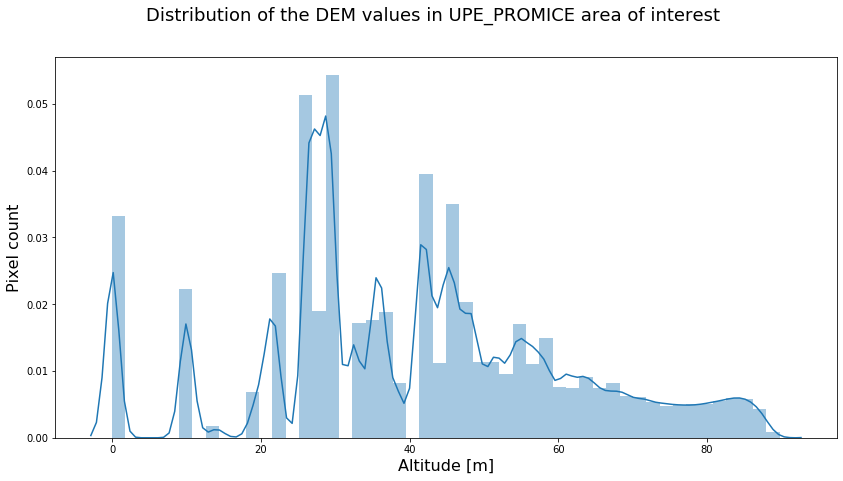

In [25]:
shape = all_slope_arr.squeeze().shape
a4_dims = (14, 7)

fig, ax = pyplot.subplots(figsize=a4_dims)

fig.suptitle('Distribution of the DEM values in UPE_PROMICE area of interest', fontsize=18)
ax.set_xlabel('Slope [deg]', fontsize=16)
ax.set_ylabel('Pixel count', fontsize=16)
#seaborn.violinplot(ax=ax, data=df, **violin_options)
sns.distplot(all_slope_arr.reshape( shape[0]*shape[1]))

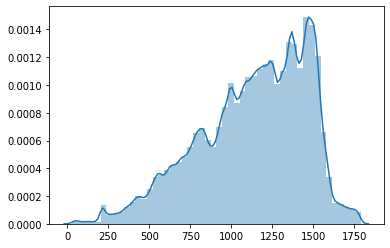

In [6]:
shape = all_elevation_arr.squeeze().shape
fig, = plt.subplots(figsize=a4_dims)
sns.distplot(all_elevation_arr.reshape( shape[0]*shape[1]))

#### 4.Plot distribution of slope:

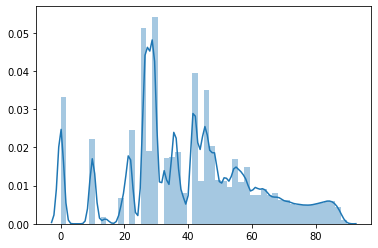

In [7]:
shape = all_slope_arr.squeeze().shape
sns.distplot(all_slope_arr.reshape( shape[0]*shape[1]))

####  5.Plot distribution of DEM_STD and DEM_VAR:

[ 30.778728  31.023779  33.109905  35.373405  38.24819   39.550064
  39.861797  40.072155  40.494473  41.906322  42.525105  42.75588
  44.00503   45.98734   46.598137  49.236927  49.267258  49.274815
  49.314507  49.574226  50.56491   51.117905  51.43426   54.71707
  54.777447  55.323982  57.07561   59.11761   60.618584  63.566597
  68.04966   71.89633   72.22036   72.84604   73.7417    74.915634
  79.55961   80.26808   80.54643   85.29642   94.54384   96.21709
 101.6355   102.347176 112.20959  114.718346 115.83538  116.0569
 116.40112  117.96497  145.06363  189.91554  301.36636  327.25894
 349.71512 ]


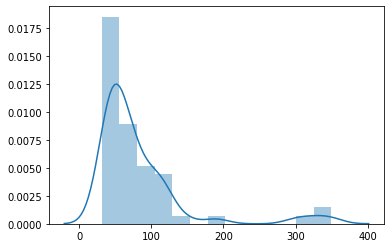

In [13]:
shape = all_std_arr.squeeze().shape
print(np.sort(all_std_arr, axis=None))
sns.distplot(all_std_arr)

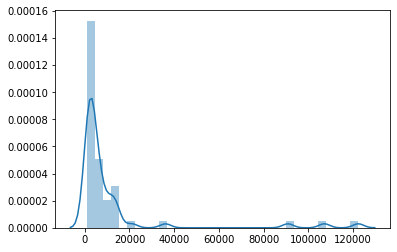

In [10]:
shape = all_var_arr.squeeze().shape
sns.distplot(all_var_arr)

##### Takeaway:

high std in area elevation can cause a lot of mountains shades (hillshades) - at this point we dont have angle of suen asd so on to calculate it so we should skip these eopatches. To avoid water that is classified wrong. 